In [12]:
import os.path as op
import matplotlib.pyplot as plt
import seaborn
import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [13]:
G = nx.fast_gnp_random_graph(40, .12)

In [34]:
pos = nx.spring_layout(G)
center = nx.center(G)

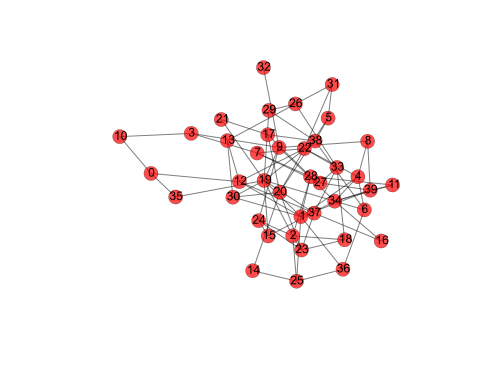

In [45]:
plt.figure(figsize=(8,6)) 
node_size = 200
alpha = .7
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=node_size, alpha=alpha)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.savefig("./static/basic_network.pdf")

Mean degree

In [36]:
sum(G.degree().values()) / float(len(G.nodes()))

4.15

In [37]:
G.degree().values()

[3,
 8,
 6,
 3,
 5,
 3,
 4,
 4,
 3,
 6,
 2,
 3,
 5,
 3,
 2,
 3,
 2,
 4,
 3,
 11,
 6,
 2,
 6,
 5,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 3,
 1,
 5,
 8,
 2,
 3,
 5,
 5,
 5]

Radius

In [38]:
nx.radius(G)

3

In [39]:
nx.eccentricity(G)

{0: 4,
 1: 3,
 2: 4,
 3: 4,
 4: 4,
 5: 5,
 6: 4,
 7: 4,
 8: 4,
 9: 4,
 10: 5,
 11: 4,
 12: 4,
 13: 4,
 14: 5,
 15: 4,
 16: 4,
 17: 4,
 18: 5,
 19: 3,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 4,
 27: 4,
 28: 4,
 29: 4,
 30: 4,
 31: 5,
 32: 5,
 33: 4,
 34: 4,
 35: 4,
 36: 4,
 37: 3,
 38: 4,
 39: 4}

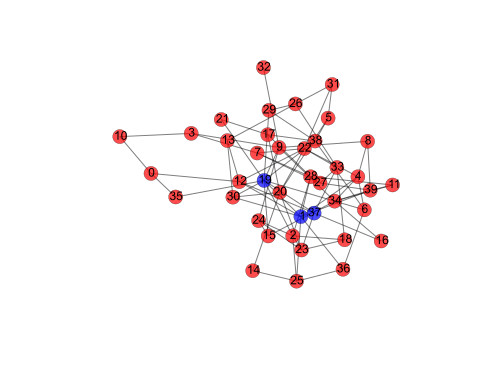

In [40]:
center = nx.center(G)

plt.figure(figsize=(8,6)) 
alpha = .7
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if node not in center], node_color='red', node_size=node_size, alpha=alpha)
nx.draw_networkx_nodes(G, pos, nodelist=center, node_color='blue', node_size=node_size, alpha=alpha)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.savefig("./static/network_with_center.pdf")

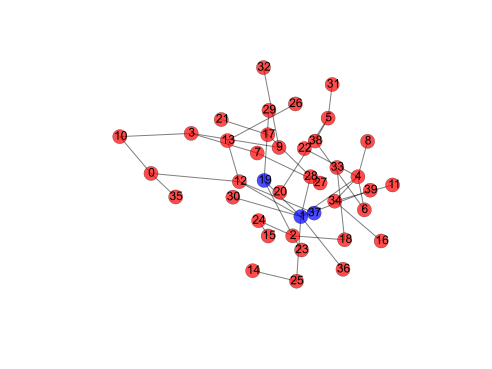

In [41]:
st = nx.minimum_spanning_tree(G)

plt.figure(figsize=(8,6)) 
node_size = 200
alpha = .7
nx.draw_networkx_edges(st, pos,width=1.0,alpha=0.5)
nx.draw_networkx_nodes(st, pos, nodelist=[node for node in G.nodes() if node not in center], node_color='red', node_size=node_size, alpha=alpha)
nx.draw_networkx_nodes(st, pos, nodelist=center, node_color='blue', node_size=node_size, alpha=alpha)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.savefig("./static/spanning_tree.pdf")

In [42]:
center

[1, 19, 37]

# Link prediction

In [ ]:
G = nx.fast_gnp_random_graph(5, .9)
pos = nx.spring_layout(G)
center = nx.center(G)

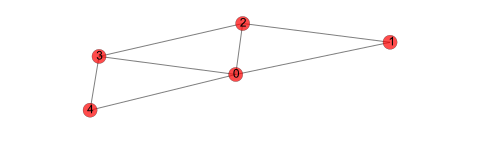

In [43]:

plt.figure(figsize=(8,2)) 
node_size = 200
alpha = .7
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=node_size, alpha=alpha)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.savefig("static/link_prediction.pdf")

In [33]:
center

[0]

In [40]:
preds = nx.adamic_adar_index(G, [(1, 3), (1, 4)])
for u, v, p in preds:
    print '(%d, %d) -> %.8f' % (u, v, p)

(1, 3) -> 1.63158675
(1, 4) -> 0.72134752


In [41]:
preds = nx.resource_allocation_index(G, [(1, 3), (1, 4)])
for u, v, p in preds:
    print '(%d, %d) -> %.8f' % (u, v, p)

(1, 3) -> 0.58333333
(1, 4) -> 0.25000000


In [42]:
preds = nx.preferential_attachment(G, [(1, 3), (1, 4)])
for u, v, p in preds:
    print '(%d, %d) -> %.8f' % (u, v, p)

(1, 3) -> 6.00000000
(1, 4) -> 4.00000000
